# HW1 - Classification models in sklearn

You'll be building a few classifier models and using some of the tech tools we learned about in Modules 1 and 2. 

## The Raw Data

The data is the the KC housing data. **I've made all the necessary data files available to you
in the assignment folder.**

Kaggle source: https://www.kaggle.com/harlfoxem/housesalesprediction

Basic data dictionary

https://geodacenter.github.io/data-and-lab//KingCounty-HouseSales2015/

Link to discussion item meaning of CONDITION and GRADE fields:

https://www.kaggle.com/harlfoxem/housesalesprediction/discussion/141767





## Preliminary Data Prep
In order to use this data for a classification problem, I did some data prep work. Our target variable is a new variable that I created called `price_gt_1M` which is a binary variable:

* 1 - house price is greater than or equal to 1 million dollars
* 0 - house price is less than a million dollars

The data for this classification problem can be found in `./data/kc_house_data_classification.csv`.

If you want to see my data prep code, see the `hw1_sklearn_dataprep.ipynb` notebook.

## The Problem

Our overall goal is to build classifier models to predict `price_gt_1M` using the the other variables. You must use sklearn Pipelines that contain your preprocessing steps and your model estimation step. We did this in the class notes.

You should do your work in a Jupyter Notebook.

### Task 1 - Folder structure

Start by creating a new project folder structure with the `cookiecutter-datascience-simple` template that I covered in Module 1. Put the data files into an appropriate folder and put this notebook in the main project folder. Any additional notebooks and/or Python files you end up creating should go in the main project folder. 

### Task 2 - Version control

Put your new project folder under version control using git. You should **NOT** track the data file. You must track all notebooks, Python scripts or additional text files you end up creating. Put appropriate information into your readme file.

### Task 3 - EDA

I suggest you start by reading the csv file into a pandas dataframe. I called my dataframe, `housing_df`.
Then start with some basic EDA. You can certainly use automated tools such as pandas-profiling, skimpy or SweetViz as I showed in the class notes. Remember, when you run some of those tools, you **must** have your notebook open in the classic Jupyter Notebook interface (and **NOT** in Jupyter Lab) Check their docs to see if Jupyter Lab is supported yet. I pip installed SweetViz and it seems to be working fine now with Jupyter Lab. As we've seen, the reports get created as HTML documents. These should go in your output folder within your project.

In [1]:
# Load in required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [2]:
# Read in Cleaned Classification File
housing_df = pd.read_csv("./data/kc_house_data_classification.csv")

In [3]:
# Preview Dataframe
housing_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_gt_1M
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,0
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,0
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,0
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,0


In [4]:
#Exploratory Data Analysis
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
 18  price_

In [5]:
#Automated EDA with SweetViz
!pip install sweetviz

In [6]:
# Import and create sweetviz report - Automated EDA (See report in Output Folder).
import sweetviz
report = sweetviz.analyze(housing_df)

C:\Users\david\anaconda3\envs\aap\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Done! Use 'show' commands to display/save.   |█| [100%]   00:01 ->


In [7]:
# Save Report in html format in the output folder
report.show_html("output/sweetviz_report.html")

Report output/sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Task 4 - Categorize feature types

As we did in the Pump it Up class notes, we are going to need to create a list of categorical variables and a list of numeric variables so that we
can apply the appropriate pre-processing to each. In the notes we used the data type of the columns to create lists of numeric and categorical variables. That's not necessarily going to work here as all the variables will come in as numeric. So, you'll have to come up with another way to create lists of the categorical variables and the numeric variables. 

Since we are using regularization, all of the numeric variables will need to rescaled using the `StandardScaler`. You'll do this later as part of the `Pipeline`. For any variables that you decide should be treated as categorical in your models, use the `OneHotEncoder` on them in the preprocessing stage.

Be careful, just because a variable has a numeric datatype in the pandas dataframe, it does **not** mean that it's necessarily a numeric variable in the context of the classification models. Think about each column and look at your EDA reports and decide whether or not it's truly numeric or needs to be treated as categorical data in the models.  

Even though our target variable, `price_gt_1M`, is categorical, you do **NOT** need to do any preprocessing on it. As I mentioned in our class notes, scikit-learn will automatically detect that and will do any encoding needed on its own.

Finally, you'll partition the dataset into training and test datasets for modeling: 

* I broke up the `housing_df` into two separate dataframes that I called `X` and `y`, to use in the models. Here's my code for that:

```
X = housing_df.iloc[:, 0:18]
y = housing_df.iloc[:, 18]
```

* Please use the following code for your data partitioning so that we all end up with the same training and test split:

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)
```

In [8]:
# List Categorical and Numerical Variables - Threshold set to 13 due to grade variable that appears to be categorical
categorical_variables = []
numeric_variables = []
minimum_unique_value = 13
for col in housing_df.columns:
    if housing_df[col].dtype == 'object' or housing_df[col].nunique() < minimum_unique_value:
        categorical_variables.append(col)
    else:
        numeric_variables.append(col)
        

In [9]:
categorical_variables

['floors', 'waterfront', 'view', 'condition', 'grade', 'price_gt_1M']

In [10]:
# Remove target variable as it does not need to be preprocessed
categorical_variables.remove('price_gt_1M')


In [11]:
categorical_variables

['floors', 'waterfront', 'view', 'condition', 'grade']

In [12]:
numeric_variables

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

### Task 4 - Logistic regression models

You are going to build a few different logistic regression models using all of the variables in our housing dataset. For each of these models you will:

- Create a pipeline to do the preprocessing (the scaling and encoding) and the modeling (we did this in the Pump it Up project)
- I'll be giving you different specifications and hyperparameter parameter settings to try
- You'll be scoring the models on overall accuracy for both the training and test data. Discuss any evidence of overfitting or underfitting as well as how the model does in comparison to the null model.
- There will be some additional tasks/questions for each model - details below

**IMPORTANT** You always should put summary comments in one or more markdown cells. Do **NOT** write them as comments in a code cell. The whole point of Jupyter notebooks is to be able to mix markdown cells with code cells. Yes, you should also include code comments but those are different than analysis comments.

#### Model 0: The null model

We always start with the simplest possible model and we call it the *null model*. For binary classification models, the null model is usually just to predict that each observation will fall into whichever class is most prevalent. In other words, what would be the performance of a model in which we just predict 0 for everyone? Scikit-learn has a way to create simple null models for classification with the `sklearn.dummy.DummyClassifier` class. See https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html for the details. You must use this class to create your null model.

#### Model 1: Ridge regression with C=1.0

Build a ridge regression model to predict `price_gt_1M` and use the default value of `C=1.0`. I used the following additional options with the `LogisticRegression` model - `solver='saga', max_iter=2000`. Feel free to change these if you want. AFter fitting the model, compute its accuracy score for training and test and write out a little summary (f-strings are useful). Here's an example:

    Training score: 0.974
    Test score: 0.971

Create confusion matrices for both training and test.

Also, create a plot of the coefficients (as we did in the notes). If you want to use that `coef_plot` function we used in the notes, you'll have
to make a few modifications because we only have one set of coefficients (since we have a binary classification problem as opposed to a 3-class problem in Pump it Up).

#### Model 2: Lasso regression with C=1.0

Same as Model 1, but use lasso regression instead of ridge regression. Create the same outputs and compare the performance to the ridge regression model.

#### Model 3: Lasso regression with C=0.01

Fit another lasso regression but use `C=0.01`. Does this enforce more or less regularization? Create the same outputs and compare the performance to the first two models. Discuss why the plot looks so different than the previous plots.

#### Model 4: Lasso regression with optimal C value

Now use `LogisticRegressionCV` to fit a model and let sklearn determine the optimal `C` value to use. Again, compute the accuracy score and confusion matrices. Also, print out the optimal value of `C`. Does regularization help for this problem?

### Task 5 - Simple decision tree
Now fit a decision tree to predict `price_gt_1M`. As we did above, for both train and test, compute the accuracy score, create a confusion matrix, and discuss the performance relative to your logistic regression models. Obviously you do not need to create a coefficient plot (why not?). 

**HACKER EXTRA:** See if you can figure out how to display the fitted tree so that it's readable. :)
 




In [13]:
# Pipeline 
# Create Transformer Objects
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore') 
# Combine Transformers into a Preprocessor Step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_variables),
        ('cat', categorical_transformer, categorical_variables)])
#Classifier Model
clf_model = LogisticRegression(penalty='l2', C=1, solver='saga', max_iter=2000)

#Append Classififier to Preprocessing Pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model)])

In [14]:
#Split Dataset
X = housing_df.iloc[:, 0:18]
y = housing_df.iloc[:, 18]

In [15]:
#Partition Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)



In [16]:
#Model 0 - Null Model
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)
dummy_clf.predict(X)
dummy_clf.score(X, y)

0.9309674732799704

93% accuracy in the null model indicates that about 93% of the instances are in the most frequent class. The target variable has one class that is significantly more prominent. This will serve as a baseline for other models. 

In [17]:
#Model 1 - Ridge Regression with C=1.0 - Done above in pipeline so code just fits here. 
clf.fit(X_train, y_train)
print("Training Score: %.3f" % clf.score(X_train, y_train))
print("Test Score: %.3f" % clf.score(X_test, y_test))

Training Score: 0.962
Test Score: 0.960


In [18]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [19]:
#Model 1 - Confusion Matrix
train_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

train_cm = confusion_matrix(y_train, train_preds)
test_cm = confusion_matrix(y_test, test_preds)

print("Confusion Matrix for Training Set:")
print(train_cm)
print("\nConfusion Matrix for Test Set:")
print(test_cm)



Confusion Matrix for Training Set:
[[15933   194]
 [  468   695]]

Confusion Matrix for Test Set:
[[3947   47]
 [ 124  205]]


In [20]:

def coef_plot(clf, title=None):
    fig, ax = plt.subplots()
    if title:
        ax.set_title(title)

    ax.plot(clf.steps[1][1].coef_[0])

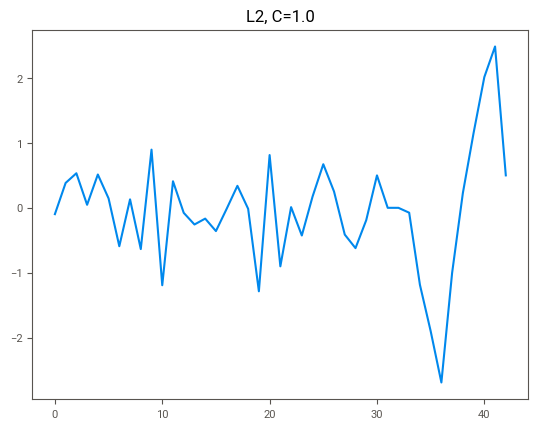

In [21]:
coef_plot(clf, 'L2, C=1.0')

## Model 1 Conclusions
The results of the ridge regression model indicates that it performs well on both the training and test datasets (96.2% and 96% respecitvely). This indicates that the model is able to generalize wel to unseen data (test score). The high score in the training model shows that it captures underlyiung patterns in the training dataset effectively. The high test score also suggests that the training data is not overfitted. Overall, the ridge regression model is a good fit and can make accurate predictions. Given that the null model is merely a baseline, it comes as no surprise that this model beats the null model in terms of accuracy. 

In [22]:
# Model 2 - Lasso Regression, C=1.0
#Classifier Model
clf_model2 = LogisticRegression(penalty='l1', C=1, solver='saga', max_iter=2000)

#Append Classififier to Preprocessing Pipeline
clf2 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model2)])

clf2.fit(X_train, y_train)
print("Training Score: %.3f" % clf2.score(X_train, y_train))
print("Test Score: %.3f" % clf2.score(X_test, y_test))

Training Score: 0.962
Test Score: 0.960


In [23]:
#Model 2 - Confusion Matrix
train_preds2 = clf2.predict(X_train)
test_preds2 = clf2.predict(X_test)

train_cm2 = confusion_matrix(y_train, train_preds2)
test_cm2 = confusion_matrix(y_test, test_preds2)

print("Confusion Matrix for Training Set:")
print(train_cm2)
print("\nConfusion Matrix for Test Set:")
print(test_cm2)



Confusion Matrix for Training Set:
[[15934   193]
 [  466   697]]

Confusion Matrix for Test Set:
[[3946   48]
 [ 125  204]]


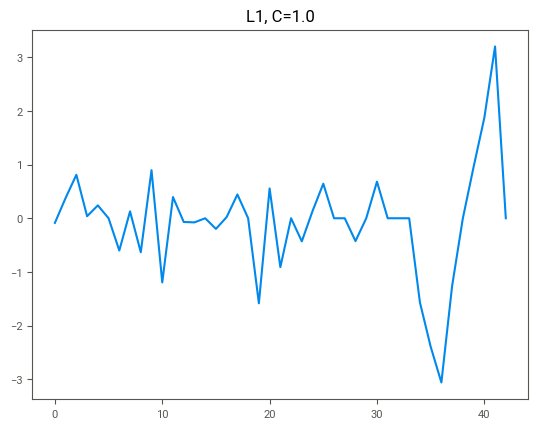

In [24]:
coef_plot(clf2, 'L1, C=1.0')

## Model 2 Conclusions
The lasso regression model with c=1 performed identically to the ridge regression model with c=1 - extremely accurate on both models. Given that the null model is merely a baseline, it comes as no surprise that this model beats the null model in terms of accuracy. Furthermore, the coefficient plots were identical. Since there is not a large variance between training and test performance, there are no immediate signs of overfitting. 

In [25]:
# Model 3 - Lasso Regression, C=0.01
#Classifier Model
clf_model3 = LogisticRegression(penalty='l1', C=0.01, solver='saga', max_iter=2000)

#Append Classififier to Preprocessing Pipeline
clf3 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model3)])

clf3.fit(X_train, y_train)
print("Training Score: %.3f" % clf3.score(X_train, y_train))
print("Test Score: %.3f" % clf3.score(X_test, y_test))

Training Score: 0.954
Test Score: 0.950


In [26]:
#Model 3 - Confusion Matrix
train_preds3 = clf3.predict(X_train)
test_preds3 = clf3.predict(X_test)

train_cm3 = confusion_matrix(y_train, train_preds3)
test_cm3 = confusion_matrix(y_test, test_preds3)

print("Confusion Matrix for Training Set:")
print(train_cm3)
print("\nConfusion Matrix for Test Set:")
print(test_cm3)


Confusion Matrix for Training Set:
[[16001   126]
 [  676   487]]

Confusion Matrix for Test Set:
[[3958   36]
 [ 180  149]]


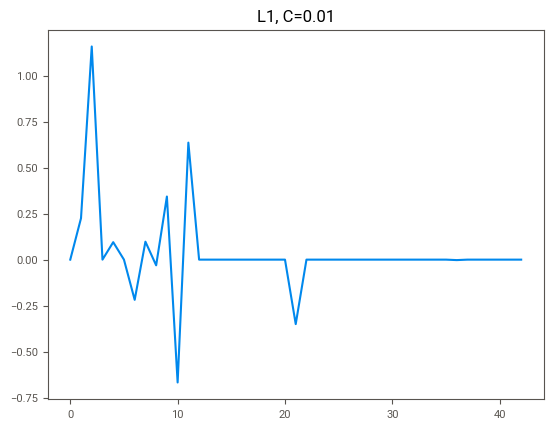

In [27]:
#Model 3 - Coefficient Plot
coef_plot(clf3, 'L1, C=0.01')

## Model 3 Conclusions
Similarly to models 1 and 2, model 3 performed slightly worse in terms of accuracy on both the training and test data. However, this is something that one would expect as models with higher C values tend to perform better. Setting C=0.01 enforces more regularization, which sometimes can prevent overfitting. The plot looks so different than those of the first 2 models because it forces a lot of the coefficients to 0. Once again, the null model is beaten out in terms of accuracy. Since there is not a large variance between training and test performance, there are no immediate signs of overfitting. 

In [28]:
# Classifier Model
clf_model4 = LogisticRegressionCV(
    Cs=[0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Reduced range of Cs
    penalty='l1',
    solver='saga',
    max_iter=1000,  # Reduced max_iter
    cv=5,
    scoring='accuracy'
)

# Append Classifier to Preprocessing Pipeline
clf4 = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', clf_model4)])

# Fit the model
clf4.fit(X_train, y_train)

# Optimal C value
optimal_C = clf_model4.C_[0]

# Print scores
print("Training Score: %.3f" % clf4.score(X_train, y_train))
print("Test Score: %.3f" % clf4.score(X_test, y_test))
print(f"The optimal C value is: {optimal_C}")


C:\Users\david\anaconda3\envs\aap\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\david\anaconda3\envs\aap\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\david\anaconda3\envs\aap\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\david\anaconda3\envs\aap\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\david\anaconda3\envs\aap\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training Score: 0.962
Test Score: 0.960
The optimal C value is: 1.0


C:\Users\david\anaconda3\envs\aap\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [29]:
# Model 4 - Confusion Matrix
train_preds4 = clf4.predict(X_train)
test_preds4 = clf4.predict(X_test)

train_cm4 = confusion_matrix(y_train, train_preds4)
test_cm4 = confusion_matrix(y_test, test_preds4)

print("Confusion Matrix for Training Set:")
print(train_cm4)
print("\nConfusion Matrix for Test Set:")
print(test_cm4)


Confusion Matrix for Training Set:
[[15934   193]
 [  466   697]]

Confusion Matrix for Test Set:
[[3946   48]
 [ 125  204]]


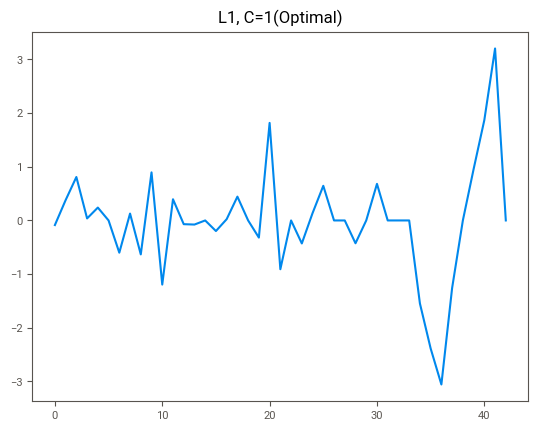

In [30]:
# Model 4 - Correlation Plot
coef_plot(clf4, 'L1, C=1(Optimal)')

## Model 4 Conlcusions
The model that seeks out the optimal value of C returns it at 1, with a training and testing accuracy that mirrors our second model (Model 2). Due to the optimal C value being around 1, it does not appear that regularization would help this problem a whole lot. Once again, the null model is beaten out here. Since there is not a large variance between training and test performance, there are no immediate signs of overfitting. 

In [31]:
# Task 5 - Simple Decision Tree
clf_Model5 = DecisionTreeClassifier(random_state=0)

#Append Classififier to Preprocessing Pipeline
clf5 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_Model5)])

clf5.fit(X_train, y_train)
print("Training Score: %.3f" % clf5.score(X_train, y_train))
print("Test Score: %.3f" % clf5.score(X_test, y_test))


Training Score: 1.000
Test Score: 0.959


In [32]:
# Decision Tree Confusion Matrix
train_preds5 = clf5.predict(X_train)
test_preds5 = clf5.predict(X_test)

train_cm5 = confusion_matrix(y_train, train_preds5)
test_cm5 = confusion_matrix(y_test, test_preds5)

print("Confusion Matrix for Training Set:")
print(train_cm5)
print("\nConfusion Matrix for Test Set:")
print(test_cm5)

Confusion Matrix for Training Set:
[[16127     0]
 [    0  1163]]

Confusion Matrix for Test Set:
[[3899   95]
 [  81  248]]


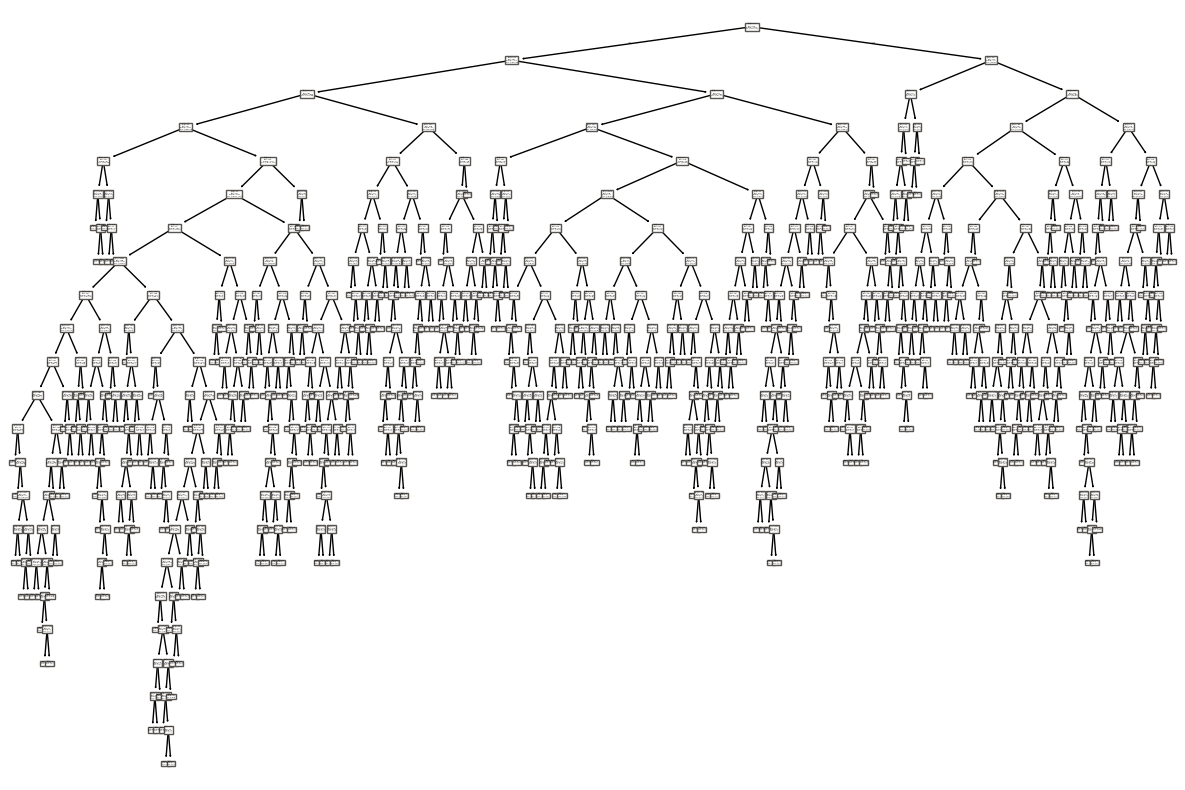

In [33]:
# Display Decision Tree
plt.figure(figsize=(15, 10)) 
plot_tree(clf5.named_steps['classifier'])
plt.show()

## Task 5 Conclusions
A decision tree does not need a correlation plot because they do not have coefficients like logistic regression models do. Rather, they split the data based on the values with the goal of creatiing groups that are as similar as possible for predictions. The decision tree outperformed all the logistic regression models on the training data, while it scored similarly in terms of accuracy on the testing data as the other 3 models - slightly lower than models 1 and 2 on the testing data. Once again, the null model is beaten out here. 

### Task 6 - a little error exploration (more challenging)

This will challenge your pandas and your general data manipulation skills. Just give it your best shot. If you don't get, you don't get it. It doesn't require much code - just the right code. :)

I also include another data file called `kc_house_data_regression.csv` in which the target variable is `price`. Everything else is exactly the same, including the order of the rows. So, here's your challenge. Using Model 2 (the lasso model with `C=1.0`), start by using the `predict` method to generate an array of predictions for the original test data. Obviously, some of the predictions are correct and some of them are not. It would be interesting to know more about the kinds of errors our model is making. We can see some things from the confusion matrix. However, since we don't have the actual `price` value, it's hard to visualize how the errors relate to it. For example, are we only making errors when the price is really close to 1 million? One way to visualize this is to create a histogram of the actual prices **only for those rows in test that we got wrong**. What makes this tricky? A few things:

* As I already mentioned, `price` is not in our original data but is in the `kc_house_data_regression.csv` dataset. Remember, other than the target variable, this dataset is identical (including the index) to the one we used above for classification.
* We partitioned the classification dataset into training and test datasets.
* In order to create the histogram, we simply need a Series (or array) of `price` values corresponding to the predictions in test that we got wrong.

**HINTS** 

* The pandas `join` method will come in handy.
* The pandas `.loc` selector can take a boolean array as an input for selecting rows or columns. Using one to select rows is quite useful for this problem.

In [34]:
# Read in Cleaned Classification File
housing_prices_df = pd.read_csv("./data/kc_house_data_regression.csv")

In [35]:
housing_prices_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,538000.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,360000.0
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,400000.0
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,402101.0
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,400000.0


In [36]:
# Pandas concat function appeared to be an easier approach given the circumstances
joined_housing_df = pd.concat([housing_df, housing_prices_df["price"]], axis=1)

In [37]:
joined_housing_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_gt_1M,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,0,538000.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,0,360000.0
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,0,400000.0
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,0,402101.0
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,0,400000.0


In [38]:
# Resplit Data to make Price the Target Variable
#X1 = joined_housing_df.iloc[:, 0:19]
#y1 = joined_housing_df.iloc[:, 19]

In [39]:
# Repartition Data into Training and Test
#X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=73)


In [71]:
y_test_predictions = clf2.predict(X_test)

In [72]:
print(y_test_predictions[:100])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


In [73]:
#Identify Incorrect Predictions
Incorrect_Predictions = y_test_predictions != y_test

In [ ]:
# Add Price Column to X_test 
X_test_with_price = X_test.copy()

# Add the 'price' column from 'new_dataframe' to X_test_with_price
X_test_with_price['price'] = joined_housing_df.loc[X_test.index, 'price']

In [55]:
# Extract Prices for Incorrect Predictions
Incorrect_Prediction_Prices = X_test_with_price.loc[Incorrect_Predictions, 'price']

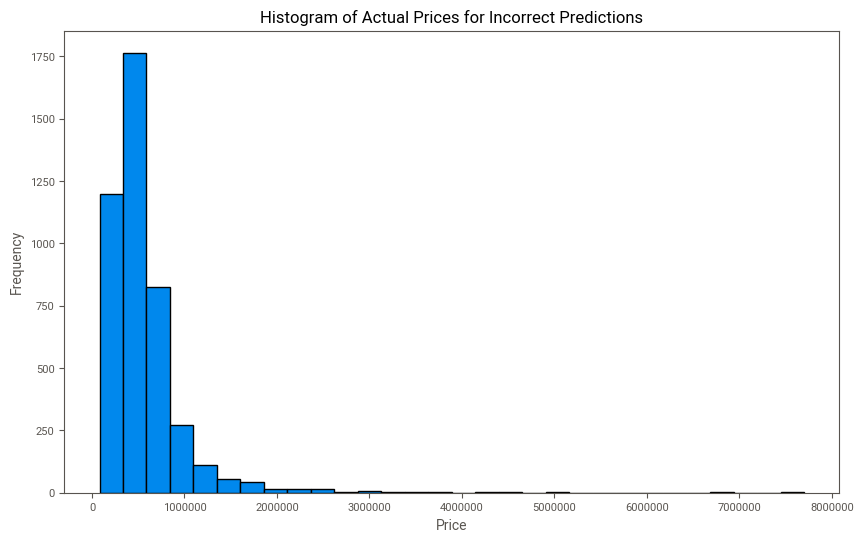

In [56]:
# Histogram Showing Error Trends
plt.figure(figsize=(10, 6))
plt.hist(Incorrect_Prediction_Prices, bins=30, edgecolor='k')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Actual Prices for Incorrect Predictions')
plt.show()

In [57]:
Incorrect_Predictions

13473    True
9626     True
21376    True
9036     True
1007     True
         ... 
662      True
16297    True
1390     True
3546     True
18167    True
Name: price, Length: 4323, dtype: bool

In [60]:
y_test

13473    0
9626     0
21376    0
9036     0
1007     0
        ..
662      0
16297    0
1390     0
3546     0
18167    0
Name: price_gt_1M, Length: 4323, dtype: int64

In [61]:
y_test_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [77]:
# Check for Correct Predictions
if any(not p for p in Incorrect_Predictions):
    print("There are correct predictions.")
else:
    print("There are no correct predictions.")

There are correct predictions.


## Prediction Conclusion
The model appears to predict housing prices inaccurately at a higher frequency when prices are worth less than a million dollars.

## Optional Hacker Extra Credit tasks
I always like to include some extra credit tasks for those who want to push themselves a little further. For this problem, consider doing one or more of the following:

* Try out the [Histogram based Gradient Boosting Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingClassifier.html?highlight=histogram%20based%20gradient%20boosting%20classifier) shown in the optional materials at the end of Module 2. Compare its performance to logistic regression and the random forest.
* I also include another data file called `kc_house_data_regression.csv` in which the target variable is `price`. Use sklearn's `LassoCV` to find a good regression model for predicting `price`.

## Deliverables
You should simply compress your entire project folder as either a zip file or a tar.gz file (do **NOT** ever use WinRAR to create rar files in this class). Note that when you do this, your "hidden" `.git` folder will get included. So, I'll be able to tell that you put the project under version control and I'll be able to look at your project folder structure. Before compressing the project folder to submit it:

* make sure all of your notebooks and other files are in the main project folder and have good filenames,
* make sure you've committed all of your changes (git),
* upload your compressed folder in Moodle.